# The Story of Book

![](https://66.media.tumblr.com/tumblr_mcolvu1mMC1roxi95o1_500.jpg)

Have you ever wondered which book to read next? I often have and to me, book recommendations are a fascinating issue. This external [dataset](https://www.kaggle.com/zygmunt/goodbooks-10k) allows us to take a deeper look at data-driven book recommendations.

This Project is splitted into 2 parts:

- **Part I: [The Story of Book](https://www.kaggle.com/omarzaghlol/goodreads-1-the-story-of-book)**
    - Explore the dataset to find some interesting insights.
- **Part II: [Book Recommender System](https://www.kaggle.com/omarzaghlol/goodreads-2-book-recommender-system)**
    - Build Recommender Systems using various techniques.

# What's in this kernel?

- [Importing Libraries and Loading Our Data](#1)
- [Have a look at the dataset](#2)
- [Cleaning Data](#3)
    - [Handle Missing Data](#4)
      - [Publication Year](#5)
      - [Language Code](#6)
      - [Publisher](#7)
    - [Handle Duplicated Books](#8)
- [Exploratory Data Analysis](#9)
  - [Books](#10)
    - [Top Rated Books](#11)
    - [Top Popular Books](#12)
    - [Top Text-Reviewed Books](#13)
    - [Top Scored Books](#14)
    - [Num of Pages](#15)
    - [Language](#16)
    - [Date](#17)
  - [Authors](#18)
    - [Filter Authors](#19)
    - [Authors with Most Books](#20)
    - [Best Rating Authors](#21)
    - [Most Ratings Authors](#22)
    - [Best Authors](#23)
  - [Ratings](#24)
    - [Remove Duplicates Ratings](#25)
    - [What is the distribution of the ratings?](#26)
    - [Number of ratings per user](#27)
    - [Distribution of mean user rating](#28)
    - [Number of ratings per book](#29)
    - [Distribution of mean book ratings](#30)
  - [Tags](#31)
    - [What influences a book’s rating?](#32)
    - [Is there a relationship between the number of ratings and the average rating?](#33)
    - [Multiple editions of each book](#34)
    - [Do frequent raters rate differently?](#35)
    - [Series of Books](#36)
    - [How long should a title be?](#37)
    - [Does having a subtitle improve the book’s rating?](#38)
    - [Does the number of authors matter?](#39)    

# Importing Libraries and Loading Our Data<a id="1"></a> <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
books = pd.read_csv('../input/goodbooks-10k/books.csv')
ratings = pd.read_csv('../input/goodbooks-10k/ratings.csv')
book_tags = pd.read_csv('../input/goodbooks-10k/book_tags.csv')
tags = pd.read_csv('../input/goodbooks-10k/tags.csv')

## Have a look at the dataset<a id="2"></a> <br>

First, let’s have a look at the dataset. It consists of the files:


- **ratings.csv**:  contains ratings and looks like that:
- **toread.csv**: provides IDs of the books marked "to read" by each user, as userid,book_id pairs.
- **books.csv**: has metadata for each book (goodreads IDs, authors, title, average rating, etc.).
- **book_tags.csv**: contains tags/shelves/genres assigned by users to books. Tags in this file are represented by their IDs.
- **tags.csv**: contains the tag_names corresponding to the tag_ids.

As the name suggests **ratings.csv** contains all users’s ratings of the books (a total of 980k ratings, for 10,000 books, from 53,424 users).

In [3]:
books.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
book_id,2767052,3,41865,2657,4671
best_book_id,2767052,3,41865,2657,4671
work_id,2792775,4640799,3212258,3275794,245494
books_count,272,491,226,487,1356
isbn,439023483,439554934,316015849,61120081,743273567
isbn13,9.78044e+12,9.78044e+12,9.78032e+12,9.78006e+12,9.78074e+12
authors,Suzanne Collins,"J.K. Rowling, Mary GrandPré",Stephenie Meyer,Harper Lee,F. Scott Fitzgerald
original_publication_year,2008,1997,2005,1960,1925
original_title,The Hunger Games,Harry Potter and the Philosopher's Stone,Twilight,To Kill a Mockingbird,The Great Gatsby


In [4]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [6]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


## *Books*

In [7]:
books.shape

(10000, 23)

In [8]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

### Features

- **book_id**: A unique Identification number for each book. 

- **best_book_id**: generally point to the most popular edition of a given book.

- **work_id**: refers to the book in the abstract sense.

- **books_count**: number of editions.

- **isbn**: Another unique number to identify the book, the International Standard Book Number.

- **isbn13**: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.

- **authors**: Names of the authors of the book. Multiple authors are delimited with `,`.

- **original_publication_year**: year when the book was first published.

- **title**: The name under which the book was published.

- **language_code**: Helps understand what is the primary language of the book. For instance, eng is standard for English.

- **average_rating**: The average rating of the book received in total.

- **ratings_count**: Total number of ratings the book received.

- **work_text_reviews_count**: Total number of written text reviews the book received.

- **ratings_1**: Total number of ratings of 1.

- **ratings_2**: Total number of ratings of 2.

- **ratings_3**: Total number of ratings of 3.

- **ratings_4**: Total number of ratings of 4.

- **ratings_5**: Total number of ratings of 5.

**Note:** You can use the goodreads book and work IDs to create URLs as follows:

`https://www.goodreads.com/book/show/<book_id>`

`https://www.goodreads.com/work/editions/<work_id>`

# Cleaning Data<a id="3"></a> <br>

## - Handle Missing Data<a id="4"></a> <br>

As you can see above, the null data we need to handle are the `original_publication_year` & `language_code`, for the rest "null" data we don't need them in both **EDA** & **Recommendation System**

I've found a [library](https://pypi.org/project/Goodreads/) that make it easy to deal with **Goodreads** api to get the null data.

you can simply install it by uncomment then running the next cell, then reads the docs to learn more about it 

In [10]:
!pip install Goodreads

  Created wheel for Goodreads: filename=goodreads-0.3.2-py3-none-any.whl size=13116 sha256=a97402f2cd46e0d09dacec340fdb36dc41e112273daa877611fbfc914a96a71b
  Stored in directory: /root/.cache/pip/wheels/1a/30/8b/09c2aa2ec42e7f3ef20d8af422dda76aa98f12ded3469ac553
  Created wheel for rauth: filename=rauth-0.7.3-py3-none-any.whl size=16057 sha256=fd7ec290b115571f4d492cbb8a552341cd64006555782790ed56322a79020e8f
  Stored in directory: /root/.cache/pip/wheels/72/7a/33/ad03f8d424e1ca6e8e53da0cea1849596ca9b7ab7ecf0b3c5d
Successfully built Goodreads rauth


Firstly, you need to get an *api_code* from [here](https://www.goodreads.com/api/keys)

In [11]:
from goodreads import client
api_key = 'k8aNpms0tdzaddORWzUHoA'
api_secret = '2Vy3eO4Nm2amvPLCxwRaufXwqKvd2pmS2E5FvNkXgg4'
gc = client.GoodreadsClient(api_key, api_secret)

### Publication Year<a id="5"></a> <br>

In [12]:
null_year = books[books.original_publication_year.isna()==True].book_id
null_year.head()

219     3609760
975       90072
3505     856917
4228         36
4247    8724779
Name: book_id, dtype: int64

In [13]:
for index,book_id in zip(null_year.index,null_year.values):
    books['original_publication_year'].iloc[index] = float(gc.book(book_id).publication_date[2])

If you need to get missing data you can uncomment and run the cells above, but it would take some time.

And below the first result after handling the *null* publication years.  

```
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10000 non-null  int64  
 1   id                         10000 non-null  int64  
 2   book_id                    10000 non-null  int64  
 3   best_book_id               10000 non-null  int64  
 4   work_id                    10000 non-null  int64  
 5   books_count                10000 non-null  int64  
 6   isbn                       9300 non-null   object 
 7   isbn13                     9415 non-null   float64
 8   authors                    10000 non-null  object 
 9   original_publication_year  10000 non-null  float64
 10  original_title             9415 non-null   object 
 11  title                      10000 non-null  object 
 12  language_code              9294 non-null   object 
 13  average_rating             10000 non-null  float64
 14  ratings_count              10000 non-null  int64  
 15  work_ratings_count         10000 non-null  int64  
 16  work_text_reviews_count    10000 non-null  int64  
 17  ratings_1                  10000 non-null  int64  
 18  ratings_2                  10000 non-null  int64  
 19  ratings_3                  10000 non-null  int64  
 20  ratings_4                  10000 non-null  int64  
 21  ratings_5                  10000 non-null  int64  
 22  image_url                  10000 non-null  object 
 23  small_image_url            10000 non-null  object 
dtypes: float64(3), int64(14), object(7)
memory usage: 1.8+ MB
```

Now you can do the same (as above) for handling missing data.

### Language Code<a id="6"></a> <br>

In [14]:
# null_language = books[books.language_code.isna()==True].book_id

# for index,book_id in zip(null_language.index,null_language.values):
#     books['language_code'].iloc[index] = gc.book(book_id).language_code

Or even getting new data!

### Publisher<a id="7"></a> <br>

In [15]:
# books['publisher'] = books.apply(lambda x: gc.book(x.book_id).publisher

## - Handle Duplicated Books<a id="8"></a> <br>

In [16]:
books[books.title.duplicated(keep=False)==True].sort_values('title').transpose()

,1291,348,5267,4185,6480,6104,5786,578,9111,3401,...,8743,330,4211,4028,2400,161,7760,2371,7002,6692
id,1292,349,5268,4186,6481,6105,5787,579,9112,3402,...,8744,331,4212,4029,2401,162,7761,2372,7003,6693
book_id,5413,11590,327242,327246,384597,11866694,11566956,197084,831470,739840,...,23844390,10916,19101283,16240761,22571540,49552,323289,12716613,825,105760
best_book_id,5413,11590,327242,327246,384597,11866694,11566956,197084,831470,739840,...,23844390,10916,19101283,16240761,22571540,49552,323289,12716613,825,105760
work_id,40802405,3048937,317880,317884,1303332,16823763,16507555,1837885,41433707,881085,...,43454866,3349846,24342394,19110442,42038027,3324344,30783,17851429,934262,1258126
books_count,22,211,5,14,24,23,15,44,83,101,...,14,76,78,53,68,675,64,75,30,27
isbn,385516487,450031063,078948045X,1402735421,571169341,1401340873,618982507,1713221,736423087,067166607X,...,NaN,61150142,385351372,62120395,525953507,NaN,044619154X,399159371,553573861,425098087
isbn13,9.78039e+12,9.78045e+12,6.35517e+11,9.7814e+12,9.78057e+12,9.7814e+12,9.78062e+12,9.78e+12,9.78074e+12,9.78067e+12,...,9.78151e+12,9.78006e+12,9.78039e+12,9.78006e+12,9.78053e+12,NaN,9.78045e+12,9.7804e+12,9.78055e+12,9.78043e+12
authors,"Stephen King, Jerry N. Uelsmann",Stephen King,Sarah Simblet,Jenő Barcsay,Tom Stoppard,Lauren Groff,Alison Bechdel,P.D. Eastman,Bob Grant,"Felix Salten, Barbara Cooney",...,Karina Halle,Jodi Picoult,"Jo Nesbø, Charlotte Barslund",Philipp Meyer,Harlan Coben,"Albert Camus, Matthew Ward",Sandra Brown,Nora Roberts,Neal Stephenson,Robert Graysmith
original_publication_year,2005,1975,2001,1953,1993,2012,2012,1960,1941,1923,...,2014,1998,2014,2012,2015,1942,1995,2012,1988,1986
original_title,'Salem's Lot The Illustrated Edition,Salem's Lot,Anatomy for the Artist,Művészeti Anatómia,Arcadia,Arcadia,Are You My Mother?: A Comic Drama,Are You My Mother?,NaN,Bambi - Eine Lebensgeschichte aus dem Walde,...,NaN,The Pact,Sønnen,The Son,The Stranger,L’Étranger,Witness,The Witness,Zodiac,Zodiac


We can see that there are **69** duplicated books (including originals).
We can get rid of duplicates by combining them with the *originals* through features like (`rating`, `ratings_count`, ...), but as it's noticed above, the duplicates may differ from the originals in some features like (`original_publication_year`, `language_code`). So we will keep them.

# Exploratory Data Analysis<a id="9"></a> <br>

## *Books*<a id="10"></a> <br>

In [17]:
def plot_books_by(df, col, n_rows=10):
    plt.figure(figsize=(12,7))
    ax = sns.barplot(x=df[col].head(n_rows), y=df['title'].head(n_rows), data=df)
    plt.title('Best ' + str(n_rows) + ' books by ' + col.replace('_',' ').capitalize(), weight='bold')
    plt.xlabel('Score of ' + col)
    plt.ylabel('Book Title')    

In [18]:
important_columns = ['title','authors','average_rating','ratings_count','work_text_reviews_count']

### Top Rated Books<a id="11"></a> <br>

In [19]:
book_sorted_ratings = books[books['ratings_count']>=1000].sort_values('average_rating', ascending=False)
book_sorted_ratings[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
3627,The Complete Calvin and Hobbes,Bill Watterson,4.82,28900,861
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré",4.77,33220,156
861,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.77,73572,7261
8853,Mark of the Lion Trilogy,Francine Rivers,4.76,9081,731
7946,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",4.76,8953,262
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75,22351,264
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,4.74,16766,149
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74,190050,6508
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73,24618,882
6919,The Indispensable Calvin and Hobbes,Bill Watterson,4.73,14597,325


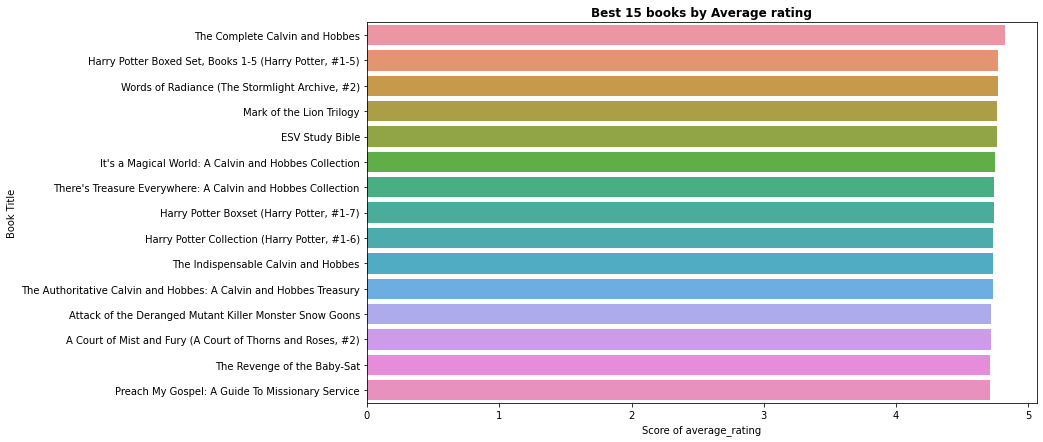

In [20]:
plot_books_by(book_sorted_ratings, 'average_rating', 15)

### Top Popular Books<a id="12"></a> <br>

In [21]:
book_sorted_ratings_count = books.sort_values('ratings_count', ascending=False)
book_sorted_ratings_count[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653,155254
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44,4602479,75867
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839,95009
3,To Kill a Mockingbird,Harper Lee,4.25,3198671,72586
4,The Great Gatsby,F. Scott Fitzgerald,3.89,2683664,51992
5,The Fault in Our Stars,John Green,4.26,2346404,140739
6,The Hobbit,J.R.R. Tolkien,4.25,2071616,37653
7,The Catcher in the Rye,J.D. Salinger,3.79,2044241,44920
9,Pride and Prejudice,Jane Austen,4.24,2035490,49152
8,"Angels & Demons (Robert Langdon, #1)",Dan Brown,3.85,2001311,25112


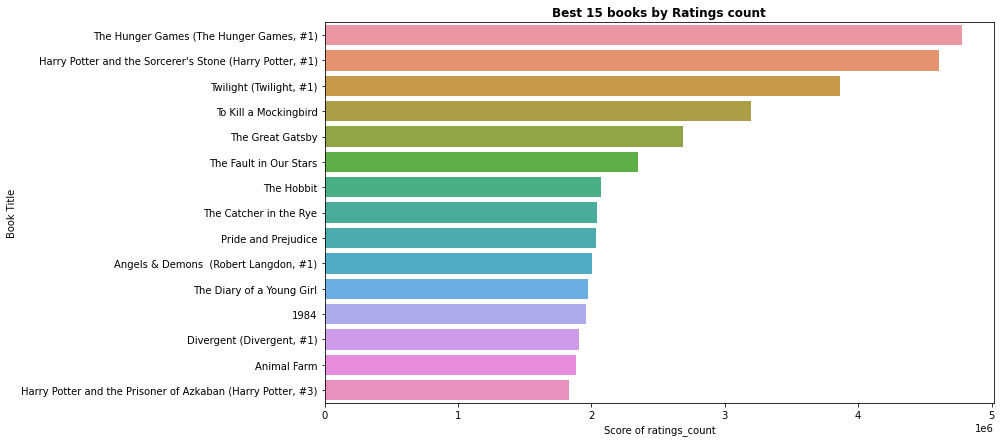

In [22]:
plot_books_by(book_sorted_ratings_count, 'ratings_count', 15)

### Top Text-Reviewed Books<a id="13"></a> <br>

In [23]:
book_sorted_reviews_count = books[books['ratings_count']>=1000].sort_values('work_text_reviews_count', ascending=False)
book_sorted_reviews_count[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653,155254
5,The Fault in Our Stars,John Green,4.26,2346404,140739
29,Gone Girl,Gillian Flynn,4.03,512475,121614
11,"Divergent (Divergent, #1)",Veronica Roth,4.24,1903563,101023
19,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,4.03,1719760,96274
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839,95009
46,The Book Thief,Markus Zusak,4.36,1159741,93611
60,The Girl on the Train,Paula Hawkins,3.88,1008778,93600
16,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,4.30,1831039,88538
30,The Help,Kathryn Stockett,4.45,1531753,78204


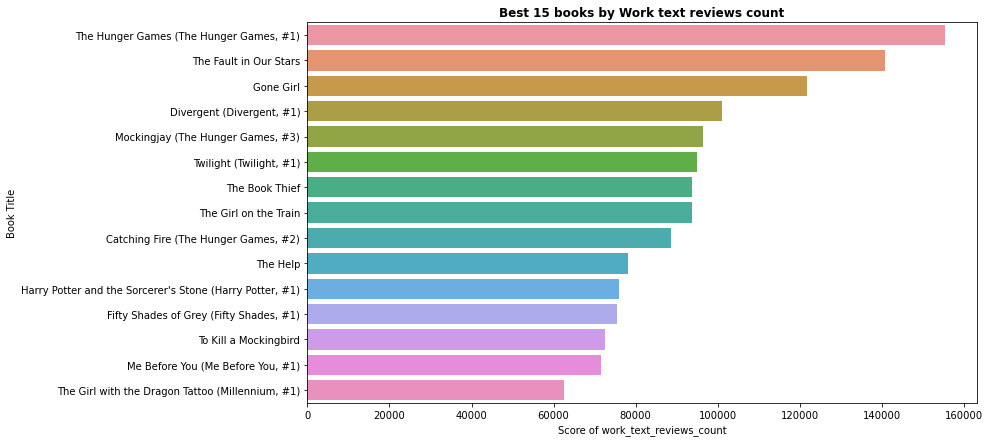

In [24]:
plot_books_by(book_sorted_reviews_count, 'work_text_reviews_count', 15)

### Top Scored Books<a id="14"></a> <br>

We try some *feature-engineering* to come with new features.

We will create a new scorer for books by combining `average_rating` & `ratings_count` with 
ratios **0.5** : **0.5**, and you can play with them.

**Note:** in the *Recommender System* Notebook, I will use a different scorer that **IMDB** uses to rank movies.

In [25]:
from sklearn.preprocessing import MinMaxScaler

We need to normalize `average_rating` & `ratings_count` to have the same scale.

In [26]:
cols = ['ratings_count','average_rating']
scaler = MinMaxScaler()
df_normalized = books[important_columns].copy()
df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

In [27]:
df_normalized.head()

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,0.795745,1.000000,155254
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",0.838298,0.962709,75867
2,"Twilight (Twilight, #1)",Stephenie Meyer,0.468085,0.808743,95009
3,To Kill a Mockingbird,Harper Lee,0.757447,0.668899,72586
4,The Great Gatsby,F. Scott Fitzgerald,0.604255,0.561110,51992


In [28]:
df_normalized['book_score'] = 0.5 * df_normalized['ratings_count'] + 0.5 * df_normalized['average_rating']

In [29]:
df_normalized_sorted_score = df_normalized.sort_values('book_score', ascending=False)
df_normalized_sorted_score.head()

,title,authors,average_rating,ratings_count,work_text_reviews_count,book_score
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",0.838298,0.962709,75867,0.900503
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,0.795745,1.000000,155254,0.897872
3,To Kill a Mockingbird,Harper Lee,0.757447,0.668899,72586,0.713173
2,"Twilight (Twilight, #1)",Stephenie Meyer,0.468085,0.808743,95009,0.638414
24,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",0.910638,0.364981,51942,0.637810


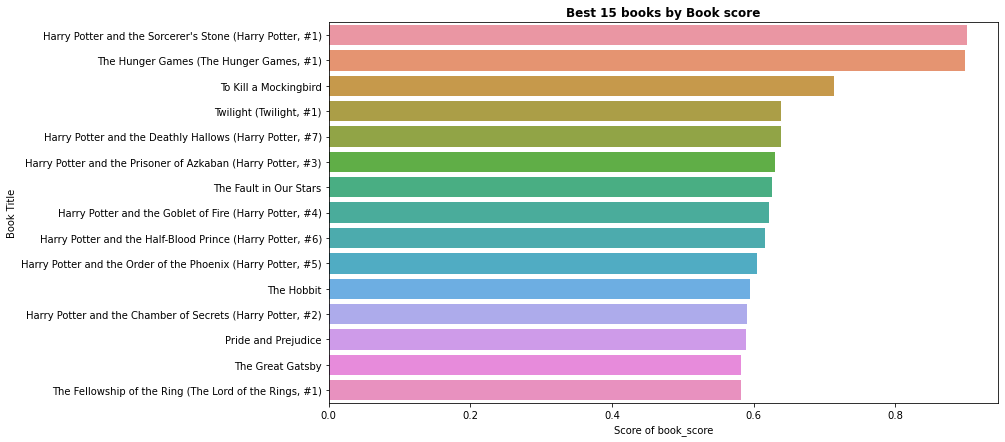

In [30]:
plot_books_by(df_normalized_sorted_score, 'book_score', 15)

It's obvious that *Harry Potter* books appear several times in best 15 books.

### Num of Pages<a id="15"></a> <br>

Also here I put some visualizations for **Num of Pages**  that I extracted from the other *Goodreads* project

![](https://66.media.tumblr.com/4b12cf009bcbf628450689d44360f198/18ec3e5a5cc9b75e-e6/s500x750/7ca9608265141da5c36cdcda69877f9df44ff349.png)

This plot doesn't give that much of an accurate inference due to the massive presence of outliers for books above 1000 pages, for the _maximum_ density is between 0-1000 pages. 

Based on that logic, let's explore the scenario in that range

![](https://66.media.tumblr.com/8e00196055106a433d2d6ce2554c97d2/18ec3e5a5cc9b75e-73/s500x750/87d8c9448d5a5e2b016f2af17519a41553f847a3.png)

From the given plot, we can infer that the highest ratings ever given, usually are for books with the page range of **200-400**, peaking near 250. It could lead to the fact that most of the people seem to prefer books with a moderate amount of pages, and that thicker books seems to scare people away. 

### Language<a id="16"></a> <br>

You might have seen in the books.csv that there is language information on the books. This is interesting because goodreads is an english speaking site. However, the dataset contains some books in different languages. The reason is that typically there are multiple editions of a book (both in the same language and in different languages). For this dataset it seems that the most popular edition was included, which for some books is their original language.

In [31]:
lang_counts = pd.DataFrame(books['language_code'].value_counts())
lang_counts.columns = ['counts']
lang_counts

,counts
eng,6341
en-US,2070
en-GB,257
ara,64
en-CA,58
fre,25
ind,21
spa,20
ger,13
per,7


In [32]:
len(lang_counts)

25

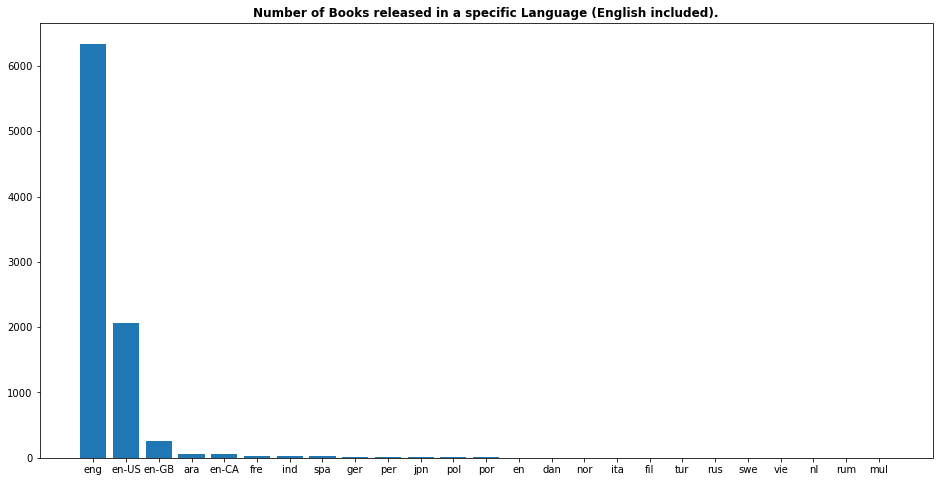

In [33]:
plt.figure(figsize=(16,8))
plt.title("Number of Books released in a specific Language (English included).", weight='bold')
plt.bar(x=lang_counts.index,height='counts', data=lang_counts);

In [34]:
lang_counts = lang_counts.drop(["en-US", "en-GB", "eng", "en-CA"])

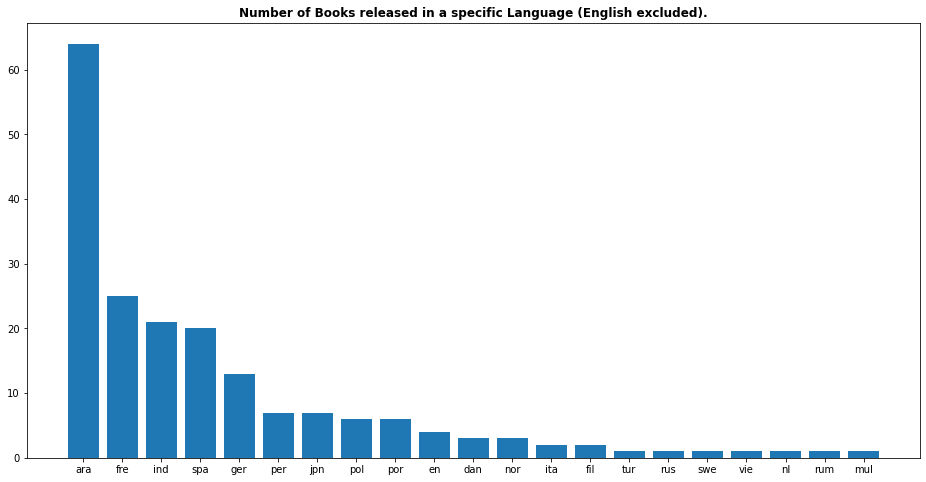

In [35]:
plt.figure(figsize=(16,8))
plt.title("Number of Books released in a specific Language (English excluded).", weight='bold')
plt.bar(x=lang_counts.index,height='counts', data=lang_counts);

### Date<a id="17"></a> <br>

#### Year

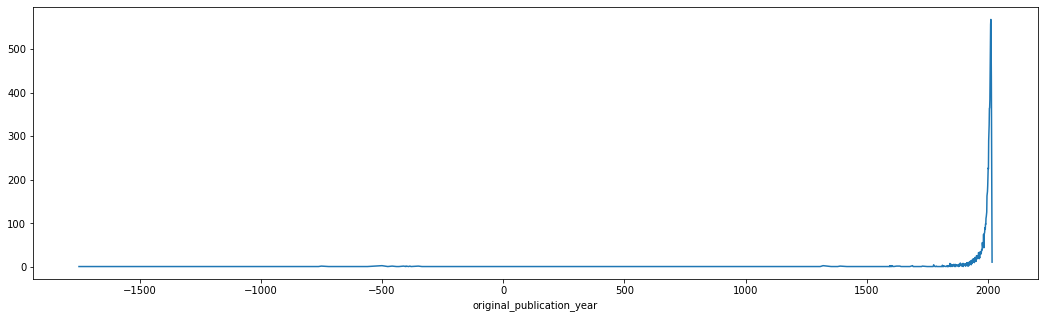

In [36]:
books['original_publication_year'] = books['original_publication_year'].astype(int)
year_count = books.groupby('original_publication_year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot();

We can see that our data has books before 1500 BC, so we will try for books after 1900.

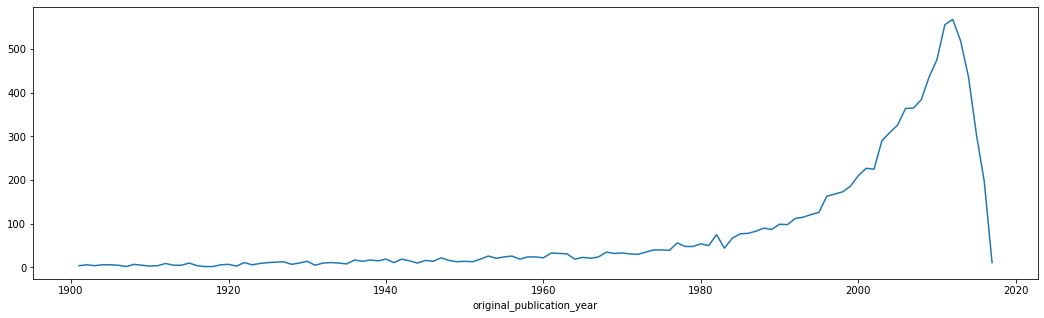

In [37]:
plt.figure(figsize=(18,5))
year_count[year_count.index > 1900].plot();

In [38]:
books.groupby('original_publication_year')['title'].count()[books.groupby('original_publication_year')['title'].count()>200]

original_publication_year
2000    210
2001    227
2002    225
2003    290
2004    309
2005    326
2006    364
2007    365
2008    384
2009    436
2010    476
2011    556
2012    568
2013    519
2014    437
2015    306
Name: title, dtype: int64

In [39]:
books[['title', 'original_publication_year']].sort_values('original_publication_year').head(10)

,title,original_publication_year
2075,The Epic of Gilgamesh,-1750
2141,The Iliad/The Odyssey,-762
340,The Iliad,-750
6165,The I Ching or Book of Changes,-750
78,The Odyssey,-720
1119,Aesop's Fables,-560
9678,The Upanishads: Translations from the Sanskrit,-500
402,The Art of War,-500
5636,The Dhammapada,-500
7777,The Analects,-476


In [40]:
books[['book_id', 'title', 'original_publication_year']].sort_values('original_publication_year').tail(10)

,book_id,title,original_publication_year
9568,32075671,The Hate U Give,2017
9391,29906980,Lincoln in the Bardo,2017
8684,28965131,Behind Her Eyes,2017
7466,28016509,The Girl Before,2017
7559,27883214,Caraval,2017
5883,30831912,Norse Mythology,2017
8281,29430788,Faithful,2017
9579,32848471,Egomaniac,2017
7447,30226723,"King's Cage (Red Queen, #3)",2017
7372,23766634,A Court of Wings and Ruin (A Court of Thorns a...,2017


As our data doesn't have the full date, I put some visualizations for **Month** and **Day** that I extracted from another *Goodreads* project of mine with different data has the full date.

**Note:** you can scrape the full date using the goodreads **api** we used above with missing data.

#### Month

![](https://66.media.tumblr.com/59a3d091859a39398ec73de02c8538e0/18ec3e5a5cc9b75e-85/s1280x1920/3c9f637376e5c8f9e385e4b9c4d75fce85c61d2b.png)

As we see, most of books were released in **September**.

![](https://66.media.tumblr.com/09b90fd4f2d83359a656b67c13896d17/18ec3e5a5cc9b75e-6f/s1280x1920/d95dcfe34b73077cac3326f0bdd009d9e0296060.png)

#### Day

![](https://66.media.tumblr.com/f0d97df9762a79d69d7ea54dbbfc3507/18ec3e5a5cc9b75e-a6/s1280x1920/9a38d8908edac01a58f071537c93978bfb0144c2.png)

As we see, most of books were released on **Tuesday**.

---

## *Authors*<a id="18"></a> <br>

### Filter Authors<a id="19"></a> <br>

In [41]:
books.authors.value_counts()

Stephen King                                                                                                                                                60
Nora Roberts                                                                                                                                                59
Dean Koontz                                                                                                                                                 47
Terry Pratchett                                                                                                                                             42
Agatha Christie                                                                                                                                             39
                                                                                                                                                            ..
Neil Gaiman, Marc Hempel, Richard Case, D'Isra

In [42]:
c = []
books.authors.apply(lambda x: c.append(x) if 'Agatha Christie' in x else [])
c

['Agatha Christie',
 'Agatha Christie, Ροζίτα Σώκου',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Mary Westmacott, Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie, Hugh Fraser',
 'Agatha Christie, Robin Bailey',
 'Agatha Christie']

In [43]:
print('The real number of books (int the data) for Agatha Christie is {} not {}.'.format(len(c),books.authors.value_counts()['Agatha Christie']))

The real number of books (int the data) for Agatha Christie is 43 not 39.


In [44]:
a = []
books.authors.apply(lambda x: a.append(x) if ',' in x else [])
a[:10]

['J.K. Rowling, Mary GrandPré',
 'George Orwell, Erich Fromm, Celâl Üster',
 'Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-Doubleday',
 'Stieg Larsson, Reg Keeland',
 'J.K. Rowling, Mary GrandPré, Rufus Beck',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré']

In [45]:
print('Number of books with multi-authors is {}.'.format(len(a)))

Number of books with multi-authors is 2079.


With *Authors*, it's difficult to make analysis on them because the goodreads data not just include the author(s), but also sometimes include the illustarator, translator and so on (separated by '**,**').

So it wouldn't be easy to know the number of books for each author as we can notice above.

So I thought in 3 solutions (and their drawbacks):

- We can simply just take the first author for each book and remove the rest
    - *Problem*: there are books with co-authors, in addition, the main author doesn't always come in the 1st place (as above).
- For books with multi-authors, we can sort them according to their number of occurrences in the whole data and just keep the most frequent one.
    - *Problem*: again, there are books with co-authors
- We can scrape data for authors (if possible) from goodreads and remove the unwanted ones.
    - *Problem*: it will cost time and effort

So I decided to try playing with the recent data as possible, and maybe someone like the illustrator affect the book rating.

In [46]:
authors_list = books['authors'].apply(lambda x: [a for a in x.split(', ')] if ',' in x else x)
authors_list.head()

0                  Suzanne Collins
1    [J.K. Rowling, Mary GrandPré]
2                  Stephenie Meyer
3                       Harper Lee
4              F. Scott Fitzgerald
Name: authors, dtype: object

**Note:**

Any cells between 

**######### \\\\// #########** 

and 

**######### //\\\\ #########**

are for explaining steps or used functions for ease-of-understanding. So you can **skip** them if you want.

**######### \\\\// #########**

In [47]:
authors_list.head(6).apply(lambda x: pd.Series(x)).stack().head(6)

0  0        Suzanne Collins
1  0           J.K. Rowling
   1          Mary GrandPré
2  0        Stephenie Meyer
3  0             Harper Lee
4  0    F. Scott Fitzgerald
dtype: object

In [48]:
authors_list.head(6).apply(lambda x: pd.Series(x)).stack().head(6).reset_index(level=1, drop=True)

0        Suzanne Collins
1           J.K. Rowling
1          Mary GrandPré
2        Stephenie Meyer
3             Harper Lee
4    F. Scott Fitzgerald
dtype: object

**######### //\\\\ #########**

For multi-authors books, we will split their authors with a copy of the book for each one.

In [49]:
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'
splitted_authors.head()

0    Suzanne Collins
1       J.K. Rowling
1      Mary GrandPré
2    Stephenie Meyer
3         Harper Lee
Name: authors, dtype: object

In [50]:
df_edited_authors = books[important_columns].drop('authors', axis=1).join(splitted_authors)
df_edited_authors.head()

,title,average_rating,ratings_count,work_text_reviews_count,authors
0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,155254,Suzanne Collins
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75867,J.K. Rowling
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75867,Mary GrandPré
2,"Twilight (Twilight, #1)",3.57,3866839,95009,Stephenie Meyer
3,To Kill a Mockingbird,4.25,3198671,72586,Harper Lee


In [51]:
books.shape, df_edited_authors.shape

((10000, 23), (13216, 5))

In [52]:
df_edited_authors.authors.value_counts()

James Patterson         98
Stephen King            97
Nora Roberts            65
Dean Koontz             64
Terry Pratchett         50
                        ..
Allen Mandelbaum         1
Gigi Levangie Grazer     1
Mark Luinenburg          1
Robert Fulghum           1
Dolen Perkins-Valdez     1
Name: authors, Length: 5841, dtype: int64

We can see now the difference as the previous largest number of books was **60** for *Stephen King*, now it's **98** for *James Patterson*.

In [53]:
def plot_authors_by(df, title, xlabel, n=15, ylabel='Author', y_size=7):
    plt.figure(figsize=(15,y_size))
    ax = sns.barplot(x=df.head(n).values, y=df.head(n).index)
    plt.title(title, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Authors with Most Books<a id="20"></a> <br>

In [54]:
authors_most_with_books = df_edited_authors.authors.value_counts()
authors_most_with_books.head(15)

James Patterson        98
Stephen King           97
Nora Roberts           65
Dean Koontz            64
Terry Pratchett        50
Agatha Christie        43
Neil Gaiman            41
J.D. Robb              41
Meg Cabot              38
Janet Evanovich        37
John Grisham           34
David Baldacci         34
Anne Rice              33
Laurell K. Hamilton    31
Michael Connelly       29
Name: authors, dtype: int64

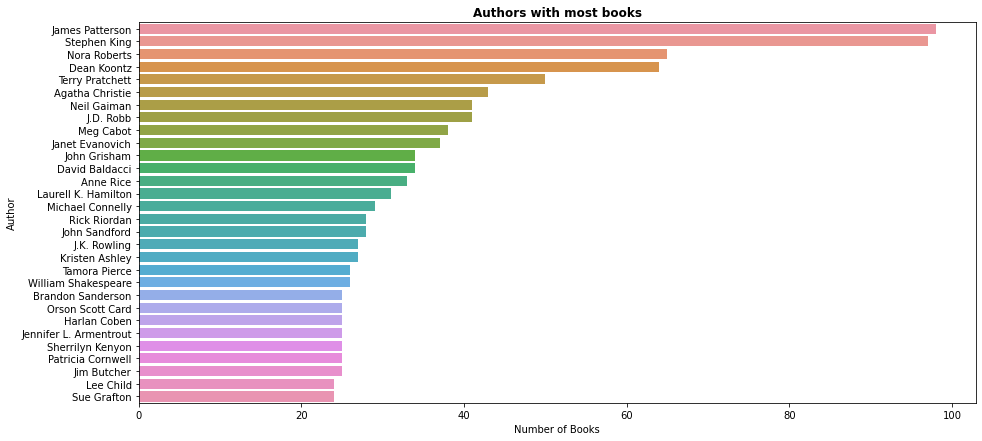

In [55]:
plot_authors_by(authors_most_with_books, 'Authors with most books', 'Number of Books', 30)

For coming analysis we need to filter authors by their *number of books* & *total ratings count*, as for an author (with just one book and few ratings of **5**), won't be the same for a popular author with avrage-rating of maybe **4.5**.

In [56]:
def at_least_books(df, n):
    more_than_n = df_edited_authors['authors'].value_counts().values >= n
    return df['authors'].isin(df['authors'].value_counts()[more_than_n == True].index)

In [57]:
def at_least_ratings_count(df, n):
    return df.ratings_count >= n

**######### \\\\// #########**

In [58]:
at_least_books(df_edited_authors, 5).head()

0     True
1     True
1     True
2     True
3    False
Name: authors, dtype: bool

In [59]:
at_least_ratings_count(df_edited_authors, 10000).head()

0    True
1    True
1    True
2    True
3    True
Name: ratings_count, dtype: bool

**######### //\\\\ #########**

Here we do some analysis trying to pick up suitable parameters for functions above.

In [60]:
df_edited_authors['authors'].value_counts().describe()

count    5841.000000
mean        2.262626
std         3.899577
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        98.000000
Name: authors, dtype: float64

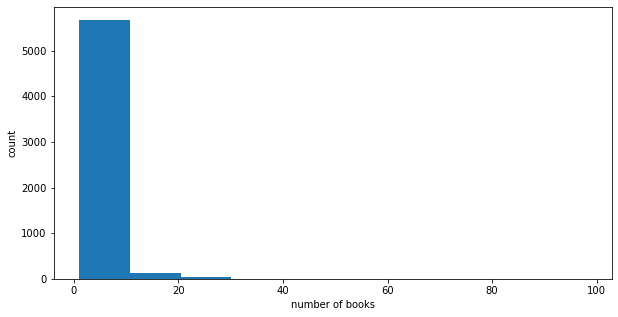

In [61]:
plt.figure(figsize=(10,5))
plt.hist(df_edited_authors.authors.value_counts().values);
plt.xlabel('number of books');
plt.ylabel('count');

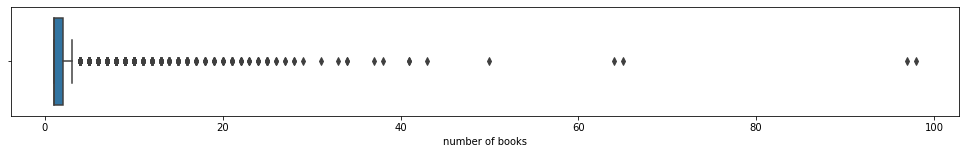

In [62]:
plt.figure(figsize=(17,2))
sns.boxplot(x=df_edited_authors.authors.value_counts(), orient='h');
plt.xlabel('number of books');

In [63]:
df_edited_authors['ratings_count'].describe()

count    1.321600e+04
mean     5.412710e+04
std      1.597093e+05
min      2.716000e+03
25%      1.340100e+04
50%      2.071900e+04
75%      4.015675e+04
max      4.780653e+06
Name: ratings_count, dtype: float64

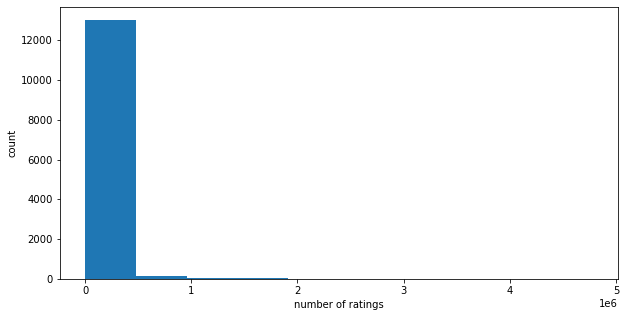

In [64]:
plt.figure(figsize=(10,5))
plt.hist(df_edited_authors['ratings_count']);
plt.xlabel('number of ratings');
plt.ylabel('count');

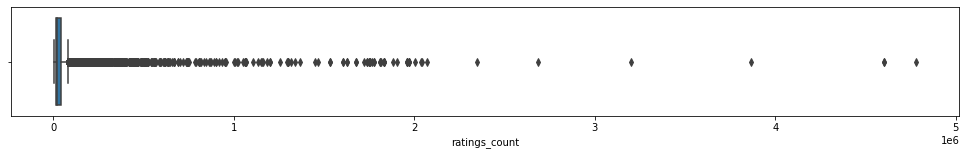

In [65]:
plt.figure(figsize=(17,2))
sns.boxplot(x=df_edited_authors['ratings_count'], orient='h');

I've chosen at least **5** books and **50k** ratings for a successful author. You can play with different values and explore the results.

In [66]:
c1 = at_least_books(df_edited_authors, 5)
c2 = at_least_ratings_count(df_edited_authors, 50000)

### Best Rating Authors<a id="21"></a> <br>

In [67]:
best_rating_authors = df_edited_authors[c1 & c2].groupby('authors')['average_rating'].mean().sort_values(ascending=False)
best_rating_authors.head(15)

authors
Bill Watterson        4.630000
Francine Rivers       4.540000
Mary GrandPré         4.497143
Sarah J. Maas         4.496667
Clive Barker          4.440000
Tsugumi Ohba          4.420000
Takeshi Obata         4.420000
Fiona Staples         4.410000
George R.R. Martin    4.393333
Brandon Sanderson     4.388333
Cassandra Clare       4.366364
Robert Kirkman        4.365000
Bisco Hatori          4.360000
A.A. Milne            4.350000
Malcolm Jones III     4.340000
Name: average_rating, dtype: float64

In [68]:
print('Best Rating Authors are {} of {} authors'.format(len(best_rating_authors),len(df_edited_authors.authors.unique())))

Best Rating Authors are 404 of 5841 authors


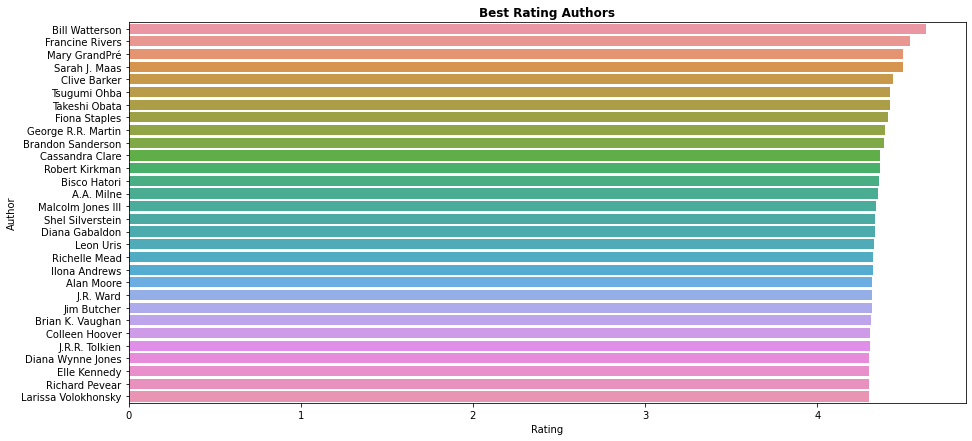

In [69]:
plot_authors_by(best_rating_authors, 'Best Rating Authors', 'Rating', 30)

### Most Ratings Authors<a id="22"></a> <br>

In [70]:
most_ratings_authors = df_edited_authors.groupby('authors')['ratings_count'].sum().sort_values(ascending=False)
most_ratings_authors.head(15)

authors
J.K. Rowling           17080451
Mary GrandPré          15205590
Stephen King            8946016
Suzanne Collins         8646393
Stephenie Meyer         8549729
J.R.R. Tolkien          5728861
Rick Riordan            5254151
Dan Brown               5002760
William Shakespeare     4622465
Cassandra Clare         4370216
Nicholas Sparks         4302436
John Green              4210889
Jane Austen             4169899
George Orwell           4047622
C.S. Lewis              3943519
Name: ratings_count, dtype: int64

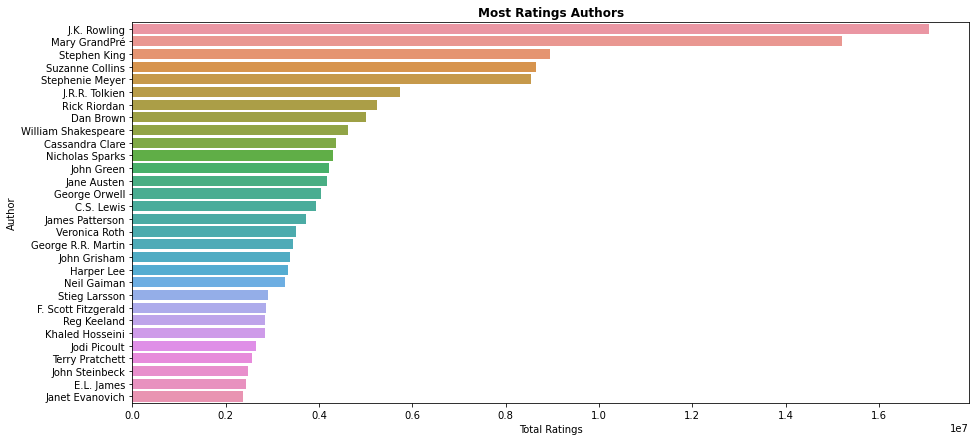

In [71]:
plot_authors_by(most_ratings_authors, 'Most Ratings Authors', 'Total Ratings', 30)

We notice here that **Mary GrandPré** achieved the 2nd place, although that she isn't an author, but the illustrator of the *Harry Potter* books in their U.S. editions.

### Best Authors<a id="23"></a> <br>

We will do some *feature-engineering* (as before with books) to create a new scorer for authors.

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
best_rating_authors_normalized = pd.DataFrame(best_rating_authors.values, index=best_rating_authors.index, columns=['rating'])
best_rating_authors_normalized['rating'] = scaler.fit_transform(best_rating_authors_normalized)
best_rating_authors_normalized.head()

,rating
authors,
Bill Watterson,1.000000
Francine Rivers,0.936620
Mary GrandPré,0.906439
Sarah J. Maas,0.906103
Clive Barker,0.866197


In [74]:
authors_rating_score = df_edited_authors['authors'].apply(lambda x: best_rating_authors_normalized.loc[x].rating if x in best_rating_authors_normalized.index else 0.0)
authors_rating_score.head()

0    0.718310
1    0.696303
1    0.906439
2    0.403756
3    0.000000
Name: authors, dtype: float64

In [75]:
most_ratings_authors_normalized = pd.DataFrame(most_ratings_authors.values, index=most_ratings_authors.index, columns=['total_rating'])
most_ratings_authors_normalized['total_rating'] = scaler.fit_transform(most_ratings_authors_normalized)
most_ratings_authors_normalized.head()

,total_rating
authors,
J.K. Rowling,1.000000
Mary GrandPré,0.890216
Stephen King,0.523682
Suzanne Collins,0.506137
Stephenie Meyer,0.500477


In [76]:
authors_ratings_count_score = df_edited_authors['authors'].apply(lambda x: most_ratings_authors_normalized.loc[x].total_rating)
authors_ratings_count_score.head()

0    0.506137
1    1.000000
1    0.890216
2    0.500477
3    0.195261
Name: authors, dtype: float64

In [77]:
df_edited_authors['author_score'] = 0.5 * authors_rating_score + 0.5 * authors_ratings_count_score
df_edited_authors['author_score'].head()

0    0.612224
1    0.848151
1    0.898327
2    0.452116
3    0.097631
Name: author_score, dtype: float64

In [78]:
best_authors = df_edited_authors.groupby('authors')['author_score'].mean().sort_values(ascending=False)
best_authors.head(15)

authors
Mary GrandPré         0.898327
J.K. Rowling          0.848151
Suzanne Collins       0.612224
J.R.R. Tolkien        0.553017
Cassandra Clare       0.535041
Rick Riordan          0.532272
Stephen King          0.525440
George R.R. Martin    0.517450
Bill Watterson        0.512536
Sarah J. Maas         0.487520
Francine Rivers       0.480846
Brandon Sanderson     0.460514
Shel Silverstein      0.459600
Richelle Mead         0.455519
Stephenie Meyer       0.452116
Name: author_score, dtype: float64

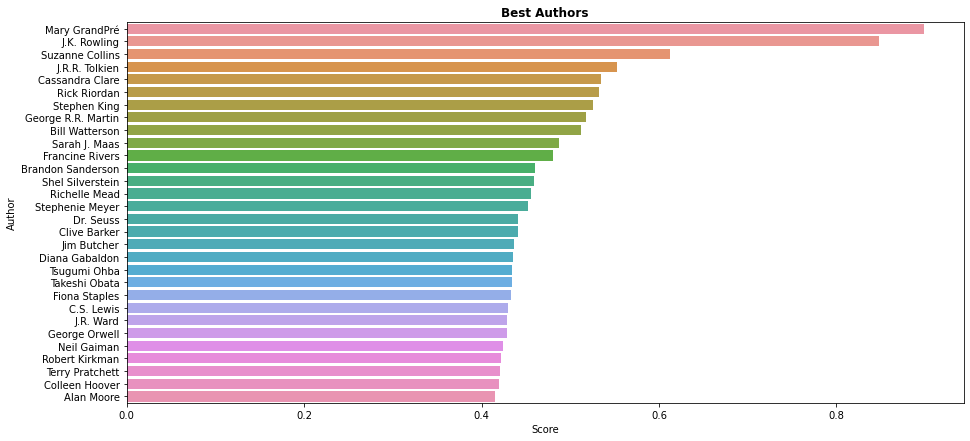

In [79]:
plot_authors_by(best_authors, 'Best Authors', 'Score', 30)

As we know that **Mary GrandPré** is an illustrator, so we can consider that **J.K. Rowling** is the best author for her fantastic *Harry Potter* Series (that also achieved the best scored books above). 

## *Ratings*<a id="24"></a> <br>

In [80]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [81]:
print('There are {} ratings.'.format(ratings.shape[0]))

There are 981756 ratings.


In [82]:
print('Number of users is {}'.format(len(ratings.user_id.unique())))

Number of users is 53424


### Remove Duplicates Ratings<a id="25"></a> <br>

In [83]:
ratings[ratings.duplicated()==True]

,book_id,user_id,rating
1171,12,40251,4
2474,25,32635,5
2959,30,31760,4
3020,31,8669,5
3334,34,26097,1
...,...,...,...
979373,9975,3133,3
980520,9988,907,4
981044,9993,33994,4
981257,9995,28898,2


In [84]:
ratings[ratings.duplicated(keep=False)==True].head(6)

,book_id,user_id,rating
1170,12,40251,4
1171,12,40251,4
2473,25,32635,5
2474,25,32635,5
2958,30,31760,4
2959,30,31760,4


In [85]:
ratings_rmv_duplicates = ratings.drop_duplicates()
ratings_rmv_duplicates.shape

(980112, 3)

To reduce calculation times, I select only a subset of users. (e.g., 20%)

In [86]:
ratings_sample = ratings_rmv_duplicates.sample(frac=0.2)
ratings_sample.shape

(196022, 3)

### - What is the distribution of the ratings?<a id="26"></a> <br>

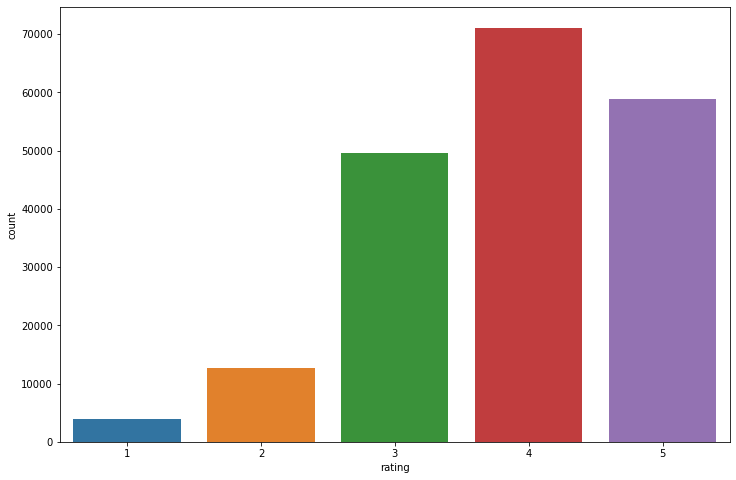

In [87]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=ratings_sample);

We see that people tend to give quite positive ratings to books. Most of the ratings are in the 3-5 range, while very few ratings are in the 1-2 range.

### - Number of ratings per user<a id="27"></a> <br>

In [88]:
ratings_per_user = ratings_sample.groupby('user_id')['user_id'].count()
ratings_per_user

user_id
1         1
2         1
5         1
7        17
8         1
         ..
53419     2
53420     1
53421     4
53422     2
53424     3
Name: user_id, Length: 40372, dtype: int64

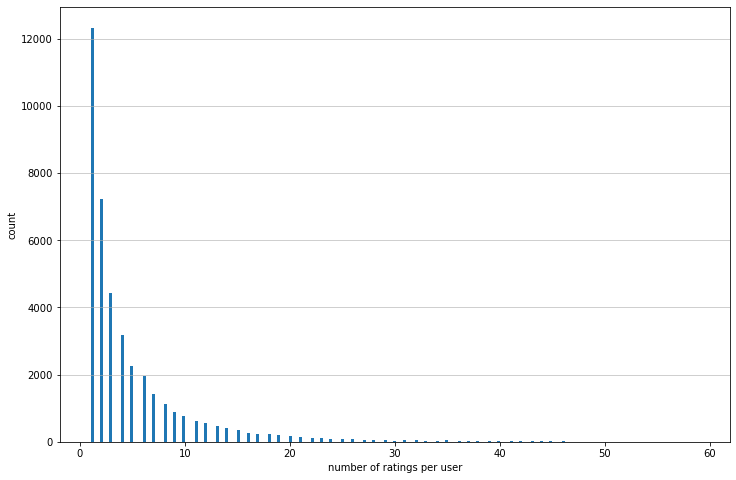

In [89]:
plt.figure(figsize=(12,8))
plt.hist(ratings_per_user ,bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of ratings per user')
plt.ylabel('count');

We can see that there are some users with many ratings. This is interesting, because we can later examine whether frequent raters rate books differently from less frequent raters. We will come back to this later.

### - Distribution of mean user rating<a id="28"></a> <br>

In [90]:
mean_rating_per_user = ratings_sample.groupby('user_id')['rating'].mean()
mean_rating_per_user

user_id
1        4.000000
2        4.000000
5        5.000000
7        3.529412
8        1.000000
           ...   
53419    2.500000
53420    3.000000
53421    5.000000
53422    4.500000
53424    4.000000
Name: rating, Length: 40372, dtype: float64

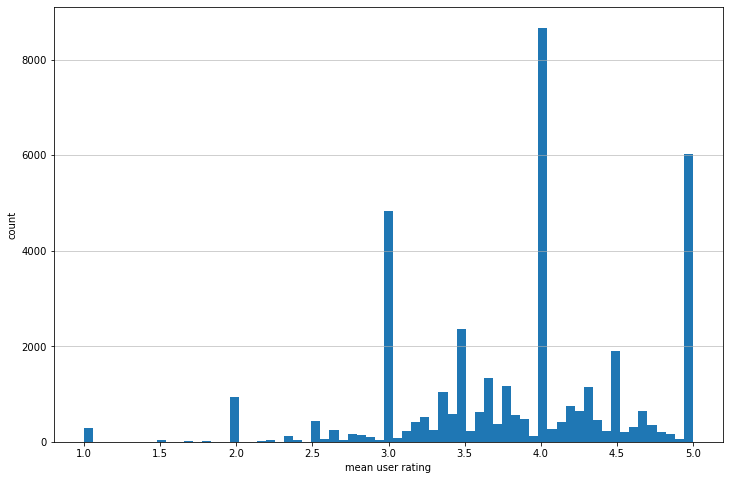

In [91]:
plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_user, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean user rating')
plt.ylabel('count');

People have different tendencies to rate books. Some already give 5 stars to a mediocre book, while others do not give 5 stars unless it is the perfect book for them. Such tendencies can be seen in the figure above. On the right side there is a bump from users with a mean rating of 5, indicating that they really liked all books (or they only rated books they really like…). We can also see that there are nearly no notoriuous downvoters rating all books with a 1. Such tendencies are going to be important for collaborative filtering later, and are typically dealt with by subtracting the user’s mean rating from their ratings.

### - Number of ratings per book<a id="29"></a> <br>

In [92]:
ratings_per_book = ratings_sample.groupby('book_id')['book_id'].count()
ratings_per_book

book_id
1        18
2        23
3        30
4        24
5        19
         ..
9996     24
9997     21
9998     19
9999     14
10000    20
Name: book_id, Length: 10000, dtype: int64

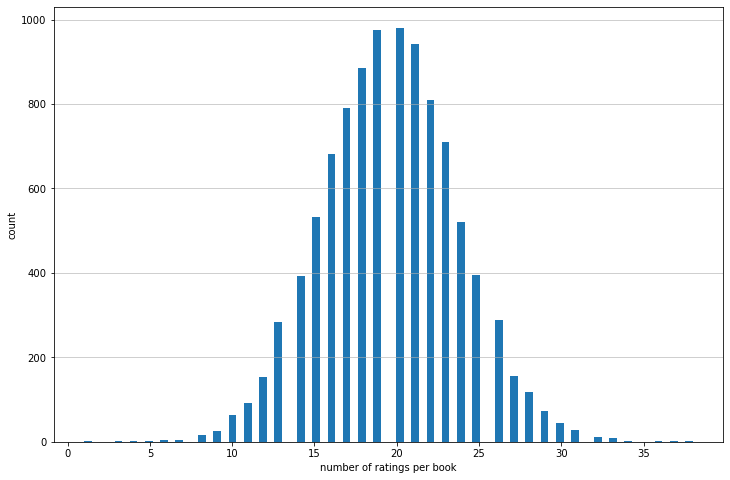

In [93]:
plt.figure(figsize=(12,8))
plt.hist(ratings_per_book ,bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of ratings per book')
plt.ylabel('count');

We can see that in the subsetted dataset most books have around 18-20 ratings.

### - Distribution of mean book ratings<a id="30"></a> <br>

In [94]:
mean_rating_per_book = ratings_sample.groupby('book_id')['rating'].mean()
mean_rating_per_book

book_id
1        4.555556
2        4.086957
3        3.166667
4        4.583333
5        3.684211
           ...   
9996     3.958333
9997     4.380952
9998     4.368421
9999     3.571429
10000    4.050000
Name: rating, Length: 10000, dtype: float64

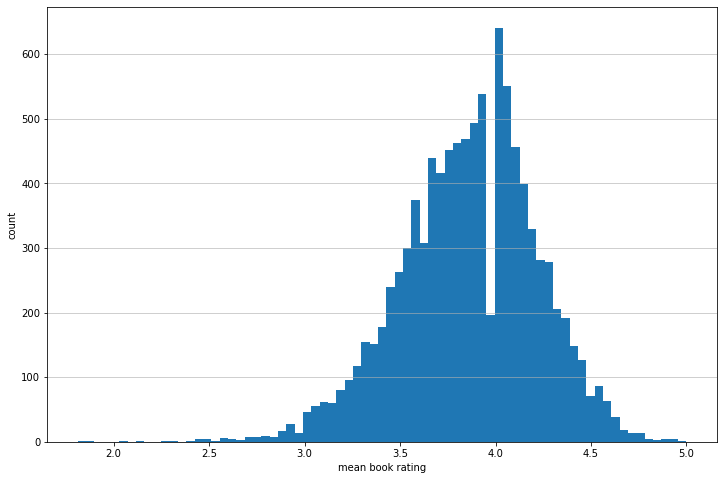

In [95]:
plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_book, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean book rating')
plt.ylabel('count');

Mean book ratings don’t reveal any peculiarities.

---

## *Tags*<a id="31"></a> <br>


Extracting the genres of the books is not trivial since users assign self-chosen tags to books, which may or may not be the same as genres defined by goodreads. As a pragmatic way I chose only the tags the match those provided by goodbooks. This could be improved by grouping similar tags together (like ‘self-help’, ‘self help’ etc. to ‘Self Help’). But I think my approach is fine for a first glance.

In [96]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [97]:
tags.shape

(34252, 2)

In [98]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [99]:
book_tags.shape

(999912, 3)

In [100]:
genres = ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics",
          "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction",
          "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror",
          "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal",
          "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", 
          "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]

In [101]:
genres = list(map(str.lower, genres))
genres[:4]

['art', 'biography', 'business', 'chick lit']

In [102]:
available_genres = tags.loc[tags.tag_name.str.lower().isin(genres)]

In [103]:
print('Number of available tags is {} out of the {} tags in genres list'.format(available_genres.shape[0], len(genres)))

Number of available tags is 31 out of the 40 tags in genres list


In [104]:
available_books_with_genres = book_tags[book_tags.tag_id.isin(available_genres.tag_id)]
available_books_with_genres.shape

(60573, 3)

In [105]:
tag_counts = pd.DataFrame(available_books_with_genres.groupby('tag_id')['count'].sum())
tag_counts.head()

,count
tag_id,
2938,30262
4605,172444
5951,73249
7077,53864
7457,1756920


In [106]:
tag_counts.set_index(available_genres.tag_name, inplace=True)
tag_counts.head()

,count
tag_name,
art,30262
biography,172444
business,73249
christian,53864
classics,1756920


In [107]:
tag_counts.sort_values('count', ascending=False, inplace=True)
tag_counts.head()

,count
tag_name,
fiction,3688819
fantasy,3548157
classics,1756920
romance,1231926
mystery,872282


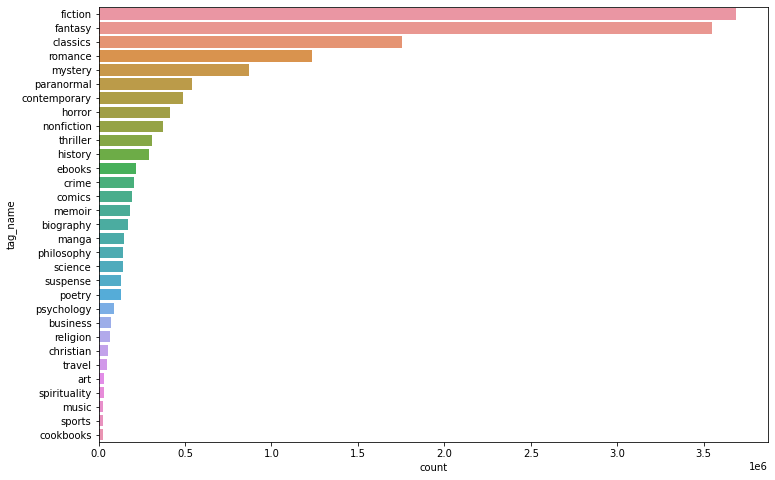

In [108]:
plt.figure(figsize=(12,8))
sns.barplot(x='count', y=tag_counts.index, data=tag_counts, orient='h');

We see that most books are “Fantasy”, “Romance”, or “Mistery” books, while there are not very many “Cookbooks” in the database.

### What influences a book’s rating?<a id="32"></a> <br>

Next, we can see, whether we can find any associations of features with a book’s rating. For a quick look, let’s first plot the correlation matrix between the books average_rating and some variables. In summary, we see only small correlations between the features and the average rating (last row), indicating that there are no strong relationships between the rating a book receives and meta-variables (like rating counts etc.). This means that the rating depends more strongly on other features (e.g. the quality of the books itself).

#### Correlation

In [109]:
cols = ['books_count','original_publication_year','average_rating','ratings_count','work_ratings_count','work_text_reviews_count']

In [110]:
corr = books[cols].corr()
corr

,books_count,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count
books_count,1.000000,-0.321807,-0.069888,0.324235,0.333664,0.198698
original_publication_year,-0.321807,1.000000,0.015760,-0.024452,-0.025493,0.027647
average_rating,-0.069888,0.015760,1.000000,0.044990,0.045042,0.007481
ratings_count,0.324235,-0.024452,0.044990,1.000000,0.995068,0.779635
work_ratings_count,0.333664,-0.025493,0.045042,0.995068,1.000000,0.807009
work_text_reviews_count,0.198698,0.027647,0.007481,0.779635,0.807009,1.000000


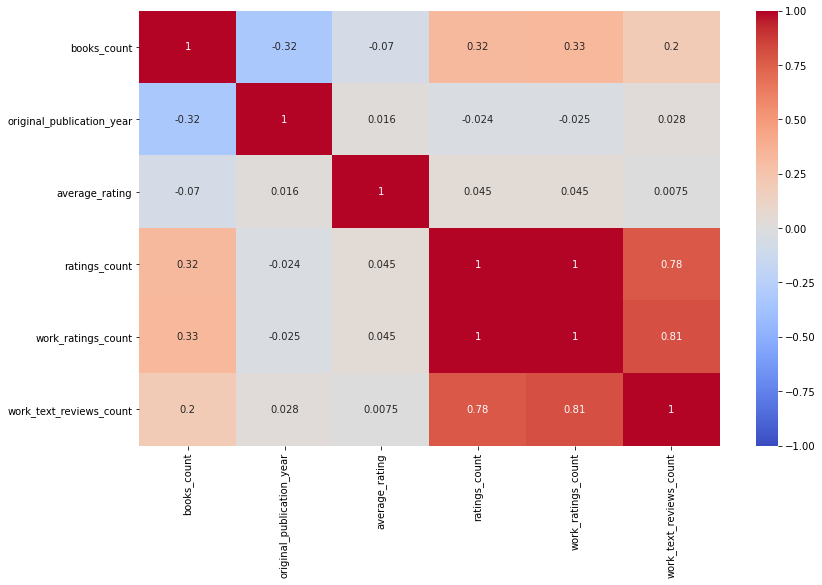

In [111]:
plt.figure(figsize=(13,8))
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot=True);

#### Removing the Duplicate Top-Half

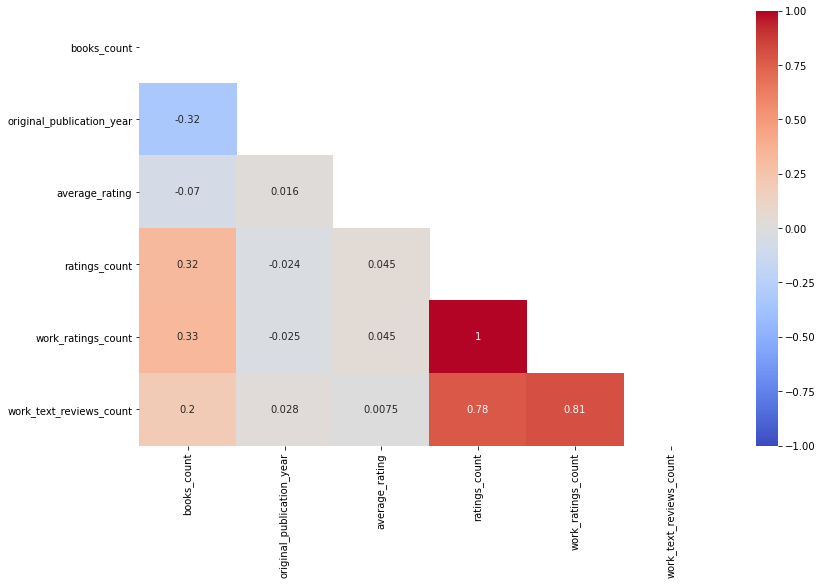

In [112]:
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(13,8))
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True, mask = mask);

### - Is there a relationship between the number of ratings and the average rating?<a id="33"></a> <br>

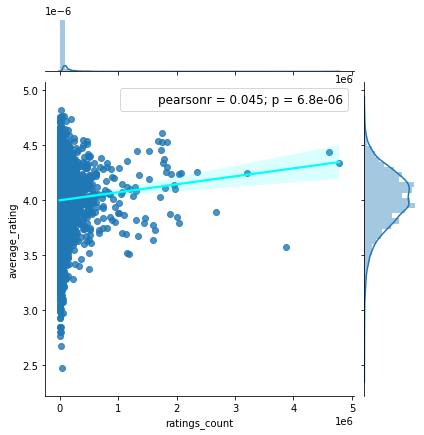

In [113]:
jp = sns.jointplot(x='ratings_count', y='average_rating', kind='reg', line_kws={'color':'cyan'}, data=books)
jp.annotate(stats.pearsonr, fontsize=12);

Theoretically, it might be that the popularity of a book (in terms of the number of ratings it receives) is associated with the average rating it receives, such that once a book is becoming popular it gets better ratings. However, our data shows that this is true only to a very small extent. The correlation between these variables is only 0.045.

### - Multiple editions of each book<a id="34"></a> <br>

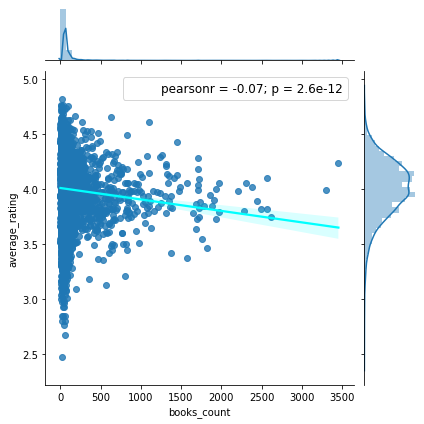

In [114]:
jp = sns.jointplot(x='books_count', y='average_rating', kind='reg', line_kws={'color':'cyan'}, data=books)
jp.annotate(stats.pearsonr, fontsize=12);

The dataset contains information about how many editions of a book are available in `books_count`. These can either be different editions in the same language or also translations of the book into different languages. So one might assume, that the better the book is the more editions should be available. In fact, data show exactly the opposite pattern: The more editions a book has the lower is the average rating. The causal direction of this association is of course unclear here.

### - Do frequent raters rate differently?<a id="35"></a> <br>

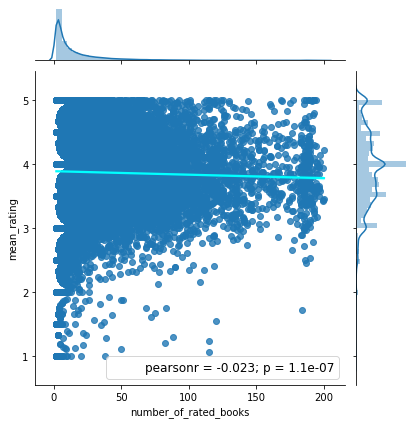

In [115]:
jp = sns.jointplot(x=ratings.groupby('user_id')['user_id'].count(),
                   y=ratings.groupby('user_id')['rating'].mean(),
                   kind='reg', line_kws={'color':'cyan'})
jp.annotate(stats.pearsonr, fontsize=12);
plt.xlabel('number_of_rated_books');
plt.ylabel('mean_rating');

It is possible, that users that rate more books (frequent raters) rate books differently from less frequent raters. The figure above explores this possibility. It seems like frequent raters tend to give lower ratings to books, maybe they are/become more critical the more they read and rate. That’s interesting.

### - Series of Books<a id="36"></a> <br>

The data contains information in the title column about whether a certain book is part of a series (e.g. the Lord of the Rings trilogy).

In [116]:
subtitle = 'the lord of the rings'
books[books.title.str.lower().str.find(subtitle) > -1][['title']].values

array([['The Fellowship of the Ring (The Lord of the Rings, #1)'],
       ['The Two Towers (The Lord of the Rings, #2)'],
       ['The Return of the King (The Lord of the Rings, #3)'],
       ['The Lord of the Rings (The Lord of the Rings, #1-3)'],
       ['J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings'],
       ['The Lord of the Rings: The Art of The Fellowship of the Ring'],
       ['The Lord of the Rings: Weapons and Warfare'],
       ['The Lord of the Rings: The Return of the King: Visual Companion'],
       ['The Lord of the Rings Sketchbook']], dtype=object)

With some exploration through the data I have found some **patterns** in *titles* :

```
(Private, #1)
(Ex-Heroes, #1)
(Forgotten Realms: The Dark Elf Trilogy, #1; Legend of Drizzt, #1)
(The Mortal Instruments #1-4)
(New Tales of the Vampires)
```

Below, I examine whether books which are part of a larger series receive a higher rating. In fact the more volumes are in a series, the higher the average rating is.

In [117]:
book_series = books[books.title.str.contains('\(.*[,:]') == True][['title', 'average_rating']]

In [118]:
print('There are {} books that are in series'.format(book_series.shape[0]))

There are 4171 books that are in series


In [119]:
book_series.head()

,title,average_rating
0,"The Hunger Games (The Hunger Games, #1)",4.34
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
2,"Twilight (Twilight, #1)",3.57
8,"Angels & Demons (Robert Langdon, #1)",3.85
11,"Divergent (Divergent, #1)",4.24


In [120]:
series = book_series.copy()
series['title'] = series['title'].str.findall('\(.*[,:]').apply(lambda x: x.pop()[1:-1])

In [121]:
series.head()

,title,average_rating
0,The Hunger Games,4.34
1,Harry Potter,4.44
2,Twilight,3.57
8,Robert Langdon,3.85
11,Divergent,4.24


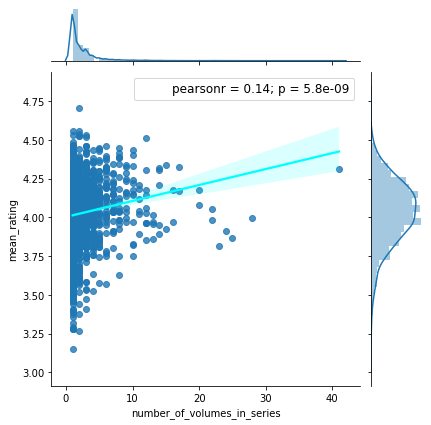

In [122]:
jp = sns.jointplot(x=series.groupby('title')['title'].count(),
                   y=series.groupby('title')['average_rating'].mean(),
                   kind='reg', line_kws={'color':'cyan'})
jp.annotate(stats.pearsonr, fontsize=12);
plt.xlabel('number_of_volumes_in_series');
plt.ylabel('mean_rating');

### - How long should a title be?<a id="37"></a> <br>

If you are an author, one of the most important choices is the title of a book. Of course the content of the title is important. However, it might also matter how long the title is. Below I therefore plot the average rating as a function of the length of the title (in words). We can see that there is in fact some variation in average rating depending on title length. Titles with 5 or 10 words seem to have slightly higher ratings.

In [123]:
title_length = books[['title', 'average_rating']]
title_length['length'] = title_length['title'].str.findall('\s').apply(lambda x: len(x)+1)

In [124]:
title_length.head()

,title,average_rating,length
0,"The Hunger Games (The Hunger Games, #1)",4.34,7
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,9
2,"Twilight (Twilight, #1)",3.57,3
3,To Kill a Mockingbird,4.25,4
4,The Great Gatsby,3.89,3


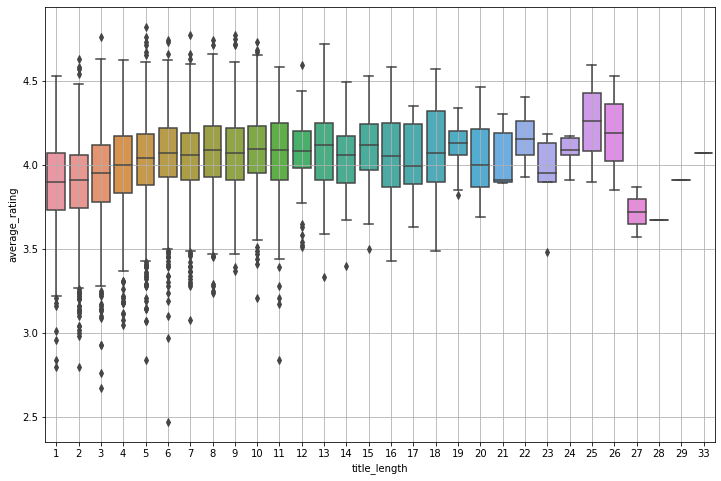

In [125]:
plt.figure(figsize=(12,8))
sns.boxplot(x='length', y='average_rating', data=title_length);
plt.xlabel('title_length');
plt.grid()

### - Does having a subtitle improve the book’s rating?<a id="38"></a> <br>

In [126]:
has_subtitle = books[['title', 'average_rating']]
has_subtitle['has_subtitle'] = title_length['title'].str.contains(':', regex=False)

In [127]:
has_subtitle.head()

,title,average_rating,has_subtitle
0,"The Hunger Games (The Hunger Games, #1)",4.34,False
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,False
2,"Twilight (Twilight, #1)",3.57,False
3,To Kill a Mockingbird,4.25,False
4,The Great Gatsby,3.89,False


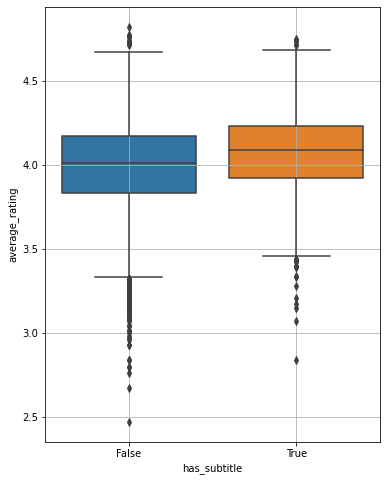

In [128]:
plt.figure(figsize=(6,8))
sns.boxplot(x='has_subtitle', y='average_rating', data=has_subtitle);
plt.grid()

We see that books that have a subtitle get rated slightly higher than books without a subtitle.

### - Does the number of authors matter?<a id="39"></a> <br>

In [129]:
n_of_authors = books.authors.apply(lambda x: len(x.split(',')))

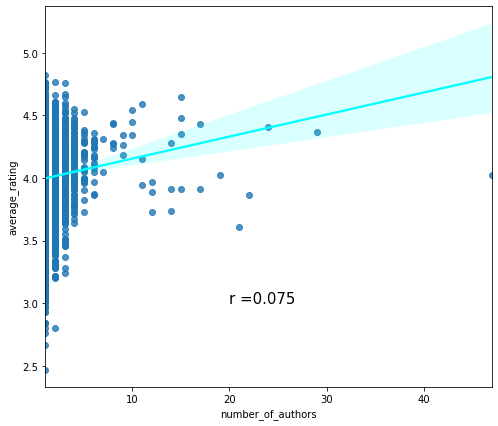

In [130]:
plt.figure(figsize=(8,7))
jp = sns.regplot(x=n_of_authors, y=books['average_rating'], line_kws={'color':'cyan'})
jp.annotate('r =' + str(round(stats.pearsonr(n_of_authors,books['average_rating'])[0], 3)),
            xy=(20,3), fontsize=15);
plt.xlabel('number_of_authors');


We all know the saying: “too many cooks spoil the broth.” Is this also true for books? Looking at the plot above it seems to be exactly the opposite: The more authors a book has the higher is its average rating.

# Summary - Part I

We identified some interesting aspects of this book datasets. In summary, observed effects on book rating are rather small, suggesting that book rating is mainly driven by other aspects, hopefully including the quality of the book itself.

In [part II](https://www.kaggle.com/omarzaghlol/goodreads-2-book-recommender-system) we will build a recommender system using different techniques.